In [15]:
from pdfminer.high_level import extract_text
import os

os.getcwd()

'C:\\Users\\inani\\OneDrive\\Desktop\\ExerciseFiles'

## Exercise 11: PCA

For this week, I decided to utilize scholarly articles detailing the Challenger explosion. The PCA system seemed to have a few flaws that I wasn't able to manage to bang out - after discussion with my peers on that matter and rewatching the lecture, it seemed to be as a result of the files I chose.

In [18]:
textdir = "C:\\Users\\inani\\OneDrive\\Desktop\\ExerciseFiles"
os.chdir(textdir)

In [17]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\inani\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
for filename in os.listdir(textdir):
    if filename.endswith('.pdf'):
        text = extract_text(filename)
        outname = filename.replace('.pdf','-nouns.txt')
        with open(outname, 'w', errors="replace") as out:
            sentences = nltk.sent_tokenize(text)
            for sentence in sentences:
                for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                    if (pos == 'NN' or pos == 'NNS'):
                        out.write(word)
                        out.write(' ')

In [20]:
def load_directory(directory):
    documents, titles = [], []
    for filename in os.scandir(directory):
        #change this to analyze a different component after changing the save above
        if not filename.name.endswith('-nouns.txt'):
            continue

        with open(filename.path) as f:
            contents = f.read()
        lemmas = contents.lower().split()

        documents.append(' '.join(lemmas))
        title = filename.name.replace('-nouns.txt', '')
        titles.append(f"{title}")
    return documents, titles

In [21]:
documents, titles = load_directory(textdir)
import sklearn.feature_extraction.text as text
print(titles[0:6])

vectorizer = text.CountVectorizer(max_features=30, token_pattern=r"(?u)\b\w+\b")
v_documents = vectorizer.fit_transform(documents).toarray()

print(v_documents.shape)
print(vectorizer.get_feature_names()[:10])

['1-s2.0-S0363811105000512-main', '105065199000400201', '1050651992006001006', '378336', 'ajp.156.10.1536', 'Communication_failures_contributing_to_the_Challenger_accident_an_example_for_technical_communicators']
(10, 30)
['0', '101', '105', '110', '111', '116', '32', '97', 'c', 'cid']


In [27]:
import matplotlib.pyplot as plt
import numpy as np

words = vectorizer.get_feature_names()
titles = np.array(titles)
x = v_documents[:, words.index('challenger')]
y = v_documents[:, words.index('explosion')]

fig, ax = plt.subplots()
for title in set(titles):
    ax.scatter(x[titles==title], y[titles==title], label=title)
ax.set(xlabel='incident', ylabel='explosion')
plt.legend();

ValueError: 'challenger' is not in list

In [25]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
documents_proj = pca.fit_transform(v_documents)

print(v_documents.shape)
print(documents_proj.shape)

(10, 30)
(10, 2)


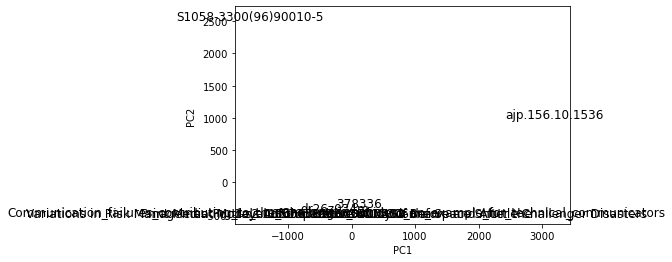

In [26]:
c1, c2 = documents_proj[:, 0], documents_proj[:, 1]

fig, ax = plt.subplots()
ax.scatter(c1, c2, facecolors='none')

for p1, p2, title in zip(c1, c2, titles):
    ax.text(p1, p2, title, fontsize=12,
            ha='center', va='center')

ax.set(xlabel='PC1', ylabel='PC2');